This is a notebook meant to display the results of the MCMC run that Tom ran over the weekend of November 17-19.

Tom varied X_in, X_out, T_jump, with each smoothly varying.

A lot of this comes from these docs:
https://github.com/dfm/emcee/blob/master/docs/tutorials/monitor.rst

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
print(emcee.__version__)
reader = emcee.backends.HDFBackend("../copy2_model_chain_weekend.h5")

3.0.0.dev0


In [8]:
tau = reader.get_autocorr_time(quiet=True)
burnin = int(2*np.max(tau))
thin = int(0.5*np.min(tau))
all_samples = reader.get_chain(discard=0, thin=1)

samples = reader.get_chain(discard=burnin, thin=thin)
log_prob_samples = reader.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = reader.get_blobs(discard=burnin, flat=True, thin=thin)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
# print("flat log prior shape: {0}".format(log_prior_samples.shape))

N/50 = 28;
tau: [ 43.38470638  42.85624549  39.36933909]


burn-in: 86
thin: 19
chain shape: (69, 12, 3)
flat log prob shape: (828,)


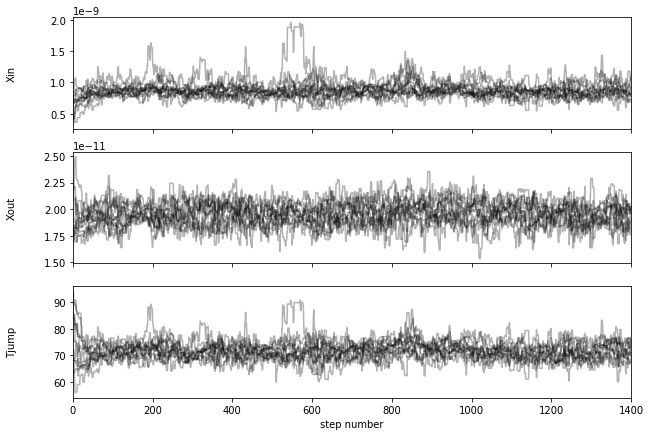

In [9]:
fig, axes = plt.subplots(all_samples.ndim, figsize=(10, 7), sharex=True)
labels = ["Xin", "Xout", "Tjump"]
for i in range(all_samples.ndim):
    ax = axes[i]
    ax.plot(all_samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(all_samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number");
plt.show()

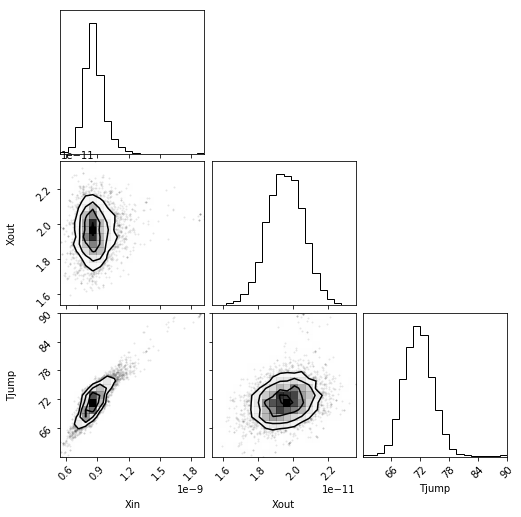

In [22]:
flat_samples = reader.get_chain(discard=burnin, flat=True, thin=3)
fig = corner.corner(flat_samples, labels=labels)
plt.show()

In [23]:
from IPython.display import display, Math

for i in range(samples.ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    
    numbers = [mcmc[1], q[0], q[1]]
    exponent = np.floor(np.log10(np.abs(mcmc[1])))
    significands = [x/10**exponent for x in numbers]
    
    if np.abs(exponent) > 3:

        txt = "\mathrm{{{4}}} = \\left( {0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}} \\right) \\times 10^{{{3:2d}}}"
        txt = txt.format(*significands, int(exponent), labels[i])
    else:
        txt = "\mathrm{{{3}}} = {0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    print(txt)
    display(Math(txt))
    

\mathrm{Xin} = \left( 8.63_{-0.82}^{+0.97} \right) \times 10^{-10}


<IPython.core.display.Math object>

\mathrm{Xout} = \left( 1.95_{-0.10}^{+0.10} \right) \times 10^{-11}


<IPython.core.display.Math object>

\mathrm{Tjump} = 71.6_{-2.9}^{+3.0}


<IPython.core.display.Math object>

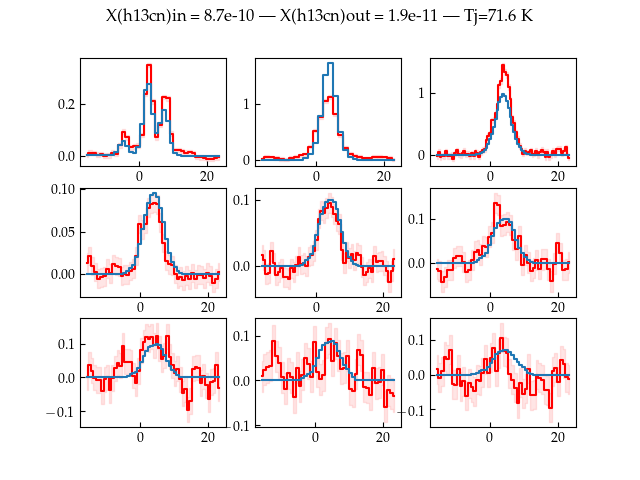

In [31]:
from IPython.display import Image
Image(filename='bestfit.png')

In [8]:
bestfit_h13cn_Xin = 8.66e-10
bestfit_h13cn_Xout = 1.95e-11

HCN_Xin = 69 * bestfit_h13cn_Xin
HCN_Xout = 69 * bestfit_h13cn_Xout

print("X(HCN) in: {:.3e}".format(HCN_Xin))
print("X(HCN) out: {:.3e}".format(HCN_Xout))

X(HCN) in: 5.975e-08
X(HCN) out: 1.345e-09


In [9]:
H2O_Xin = 5e-6
H2O_Xout = 1.5e-8

HCN_H2O_in = HCN_Xin / H2O_Xin
HCN_H2O_out = HCN_Xout / H2O_Xout
HCN_H2O_mid = HCN_Xin / H2O_Xout

print("HCN/H2O inner: {:.3f}".format(HCN_H2O_in))
print("HCN/H2O outer: {:.3f}".format(HCN_H2O_out))
print("HCN/H2O mid: {:.2f}".format(HCN_H2O_mid))


HCN/H2O inner: 0.012
HCN/H2O outer: 0.090
HCN/H2O mid: 3.98


In [10]:
water_jump = H2O_Xin/H2O_Xout
HCN_jump = HCN_Xin/HCN_Xout
print(water_jump)
print(HCN_jump)

333.33333333333337
44.410256410256416


In [11]:
# In Orion KL
HCN_Xorionkl = 6.4e-7 # From Crockett et al 2014
H2O_Xorionkl = 6.5e-4 # From Neill et al 2013b, actually

HCN_H2O_orionkl = HCN_Xorionkl / H2O_Xorionkl
print("HCN/H2O Orion KL: {:.4f}".format(HCN_H2O_orionkl))


HCN/H2O Orion KL: 0.0010


In [12]:
# In comets, from Mumma & Charnley 2011
HCN_H2O_comets = 0.2 * 1/100
NH3_H2O_comets = 0.6 * 1/100
HNCO_H2O_comets = 0.04 * 1/100
HNC_H2O_comets = 0.01 * 1/100
print("HCN/H2O in comets: {:.4f}".format(HCN_H2O_comets))
print("NH3/H2O in comets: {:.4f}".format(NH3_H2O_comets))

volatile_N_H2O_comets = sum([HCN_H2O_comets, NH3_H2O_comets, HNCO_H2O_comets, HNC_H2O_comets])
print("volatile N/H2O in comets: {:.4f}".format(volatile_N_H2O_comets))


HCN/H2O in comets: 0.0020
NH3/H2O in comets: 0.0060
volatile N/H2O in comets: 0.0085


In [24]:
# Wyckoff et al (1991) reports that 90% of Comet Halley's N is in dust. So let's scale up.

total_N_H2O_comets = volatile_N_H2O_comets * 10
print("HCN/H2O in comets:                  {:.3f}".format(HCN_H2O_comets))
print("NH3/H2O in comets:                  {:.3f}".format(NH3_H2O_comets))
print("total N/H2O in comets (incl. dust): {:.3f}".format(total_N_H2O_comets))
print("")
print("HCN/H2O, Orion KL Hot Core:         {:.4f}".format(HCN_H2O_orionkl))
print("Organic N/H2O, Orion KL Hot Core:   {:.4f}".format(HCN_H2O_orionkl/0.74))
print("")
print("HCN/H2O, inner envelope IRAS 16293: {:.3f}".format(HCN_H2O_in))
print("HCN/H2O, outer envelope IRAS 16293: {:.3f}".format(HCN_H2O_out))

HCN/H2O in comets:                  0.002
NH3/H2O in comets:                  0.006
total N/H2O in comets (incl. dust): 0.085

HCN/H2O, Orion KL Hot Core:         0.0010
Organic N/H2O, Orion KL Hot Core:   0.0013

HCN/H2O, inner envelope IRAS 16293: 0.012
HCN/H2O, outer envelope IRAS 16293: 0.090
